In [32]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
# read the csv file using read_csv function of pandas
train = pd.read_csv("dataSet/train.csv")
train.head()


,filename,width,height,classh,xmin,ymin,xmax,ymax
0,192_jpg.rf.a44d116b12d2efa63b37fe6bc7b5318d.jpg,837,1024,fracture,204,444,256,494
1,29_jpg.rf.a358d0249bf4ce4ecc85be891f7d1721.jpg,448,1024,fracture,243,618,270,645
2,73_jpg.rf.aa734b5afb647f0f8564eac868d4847f.jpg,383,1024,line,178,497,229,546
3,73_jpg.rf.aa734b5afb647f0f8564eac868d4847f.jpg,383,1024,angle,126,447,176,519
4,177_jpg.rf.a5f6e20d94ccf5454db6408b2d8dc0a0.jpg,603,1024,fracture,232,373,283,407


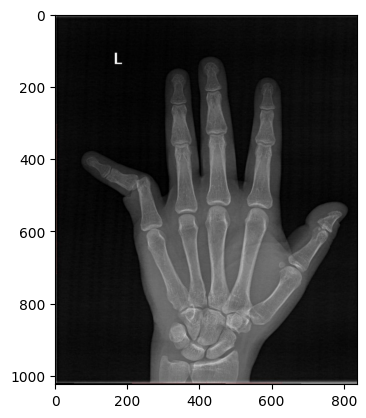

In [33]:
image = plt.imread('dataSet/train/192_jpg.rf.a44d116b12d2efa63b37fe6bc7b5318d.jpg')
plt.imshow(image)

In [34]:
train['filename'].nunique()


311

In [35]:
train['classh'].value_counts()

fracture           229
line               112
messed_up_angle     53
angle               23
Name: classh, dtype: int64

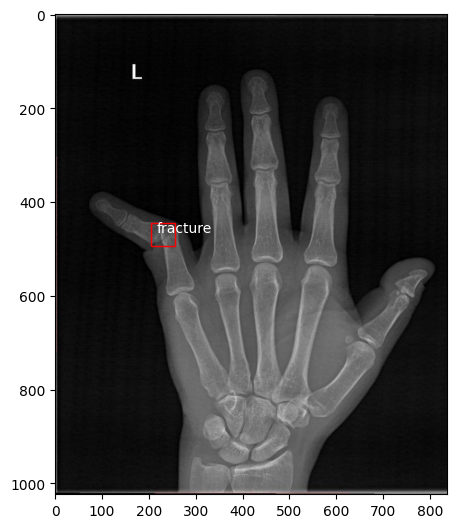

In [36]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('dataSet/train/192_jpg.rf.a44d116b12d2efa63b37fe6bc7b5318d.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.filename == "192_jpg.rf.a44d116b12d2efa63b37fe6bc7b5318d.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.classh == 'fracture':
        edgecolor = 'r'
        ax.annotate('fracture', xy=(xmax-40,ymin+20),color='white')
    elif row.classh == 'line':
        edgecolor = 'b'
        ax.annotate('line', xy=(xmax-40,ymin+20))
    elif row.classh == 'messed_up_angle':
        edgecolor = 'g'
        ax.annotate('messed_up_angle', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

Implementing Faster R-CNN
For implementing the Faster R-CNN algorithm, we will be following the steps mentioned in this Github repository. So as the first step, make sure you clone this repository. Open a new terminal window and type the following to do this:

We need to convert the .csv format into a .txt file which will have the same format as described above.Make a new dataframe, fill all the values as per the format into that dataframe, 
and then save it as a .txt file.
https://medium.com/analytics-vidhya/a-practical-implementation-of-the-faster-r-cnn-algorithm-for-object-detection-part-2-with-cac45dada619

In [38]:
data = pd.DataFrame()
data['format'] = train['filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['classh'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')